## Setting up the environment

In [ ]:
import numpy as np # This is the main numerical library we will use
import matplotlib.pyplot as plt # This is the main plotting library we will use
import scipy.io.wavfile as wavfile # We will use this library to load in audio
import IPython.display as ipd # This is a library that allows us to play audio samples in Jupyter

## Basic Arithmetic / Variable Naming

In [ ]:
# Go through +, *, /, **, %
1+1

In [ ]:
9*8

In [ ]:
10/4

In [ ]:
2**2 + 2

In [ ]:
20 % 6  # Remainder

In [ ]:
a = 5 # This sets the variable a to be 5
b = 2

In [ ]:
b**2

In [ ]:
a = a + 1  #  This is weird syntax, but it means set a to be the previous value of a plus 1

In [ ]:
a**a

In [ ]:
matt = 0

In [ ]:
1 / matt

In [ ]:
1matt = 0  # Cannot start a variable name with a number

In [ ]:
christralie = 30

In [ ]:
print(ChrisTralie)  # Case sensitive!!

## Numpy Arrays / Plotting

In [ ]:
x = [1, 9, -10, 2]

In [ ]:
x[4]

In [ ]:
x[0]  # Lists are zero-indexed

In [ ]:
x[2]

In [ ]:
x[-1]

In [ ]:
x[-2]

In [ ]:
x = [i**2 for i in range(1000)]

In [ ]:
x[-1]

In [ ]:
len(x) # This gets the length of the list

In [ ]:
# Slicing
mylist = [12, 9, -2, 8, 17, 13, 24]
firstfour = mylist[0:4]
print(firstfour)

In [ ]:
print(mylist[2:5])

In [ ]:
print(mylist[0:5:2])

In [ ]:
mylist[0:5:2] = 0 # This is a limitation of lists

In [ ]:
mylist[0:5:2] = [0, 0, 0]
print(mylist)

In [ ]:
mylist[0] = 64
print(mylist)

In [ ]:
list1 = [0, 1, 2, 3, 4, 5, 6, 7]
list2 = [2, 4, 6, 8, 10, 12, 14, 16]
list1[0:7:2] = list2[1:8:2]
print(list1)
print(list1[0:7:2])

In [ ]:
# We can leave out the last element
print(list1[0: :3]) # Take every third element starting at element 0

In [ ]:
print(list1[2: : ]) # Take every element from 2 to the end

In [ ]:
print(list1[::-1])

In [ ]:
x = [1, 2, 3, 4, 5]
print(x[5::])
y = [3, 8, 9]
x[5::] = y
print(x)

In [ ]:
# The + by default with lists puts one list at the end of the other
a = [1, 2, 3]
b = [2, 3, 4]
print(a + b)

In [ ]:
# arange, zeros, ones, plot/stem

In [ ]:
np.arange?

In [ ]:
x = np.arange(10) + 1  # Element-wise add
# This is *much* faster than adding to individual elements
#x[0] = x[0] + 1
#x[1] = x[1] + 1
print(x)

In [ ]:
x = x*x # Element-wise multiplication
print(x)

In [ ]:
x = x + x
print(x)

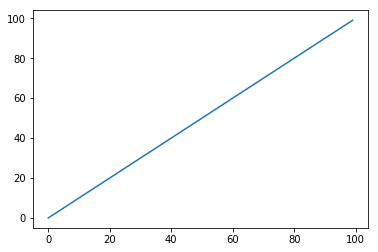

In [62]:
plt.plot(x)

<StemContainer object of 3 artists>

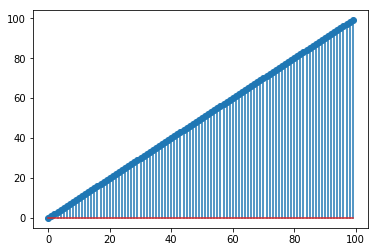

In [63]:
plt.stem(x)

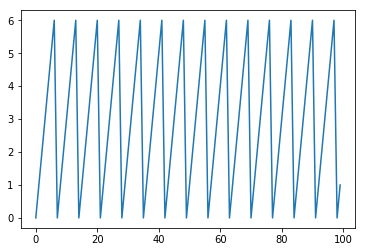

In [61]:
x = np.arange(100)
plt.plot(np.mod(x, 7)) # "Modulus operator": Returns remainder after division

Class exercise: Make the array [0, 1, 0, 3, 0, 5, 0, 7, 0] using arange and slicing

In [64]:
x = np.arange(8)
print(x)
x = x*2
print(x)
x = x + 1
print(x)
x = np.mod(x, 8)
print(x)

[0 1 2 3 4 5 6 7]
[ 0  2  4  6  8 10 12 14]
[ 1  3  5  7  9 11 13 15]
[1 3 5 7 1 3 5 7]


In [ ]:
## Andrew/Kat
x = np.arange(17)
print(x)
y = np.mod(x, 8)
print(y)
y = y[1::2]
print(y)

# Class exercise: Create an array with the elements [1, 3, 5, 7, 1, 3, 5, 7]
# using np.arange and np.mod


In [66]:
## You can really cheat with regular lists
x = [1, 3, 5, 7]
x = x + x
print(x)

[1, 3, 5, 7, 1, 3, 5, 7]


## Audio Waveforms

In [ ]:
# Class exercise: Load in audio and pull out "birth" to play
fs, x = wavfile.read("happybirthday.wav")
plt.plot(x)
ipd.Audio(x, rate=fs)

In [ ]:
## Play twice as fast
ipd.Audio(x, rate=fs*2)

In [ ]:
# "Decimate" in time by a factor of 12 (take 1 out of every 12 samples) to demo aliasing
y = x[0::12]
plt.plot(y)
ipd.Audio(y, rate=fs/12)

In [ ]:
y = x[::-1] #Reverse audio
ipd.Audio(y, rate=fs)

## Sinusoids

In [ ]:
# linspace review

In [ ]:
# TODO: Change to use formula for halfsteps
freq = 440  # Our played note will be a 440 Hz A
fs = 44100  # 44100 samples per second
seconds = 1  # Note duration of 1 seconds

# Generate array with seconds*sample_rate steps, ranging between 0 and seconds
t = np.linspace(0, seconds, seconds * fs, False)

# Generate a 440 Hz sine wave
x = np.sin(2*np.pi*freq*t)
plt.plot(t, x)
plt.xlim([0, 0.05]) # Show the first 50 milliseconds
plt.xlabel("Seconds")
ipd.Audio(x, rate=fs)


The formula for the frequency of a note $h$ halfsteps away from a 440hz is

$ f = 440 * 2^{h/12}$

In [ ]:
## Class exercise: Play the major triad notes A, C#, E in a sequence

# Hint: Here is an A + silence + A
# C# is 4 halfsteps above A
# E is 7 halfsteps above A
y = np.zeros(t.size*3)
y[0:t.size] = np.sin(2*np.pi*440*t)
y[2*t.size::] = np.sin(2*np.pi*440*t)

ipd.Audio(y, rate=fs)

In [ ]:
# Show triangle wave


## Methods

In [ ]:
# Introduce methods

In [ ]:
# Make a method that returns sinusoids at an appropriate frequency

## Echoes / Convolution

In [ ]:

fs, x = wavfile.read("happybirthday.wav")
ipd.Audio(x, rate=fs)

In [ ]:
y = np.array(x) # Copy over x
## TODO: Add an echo of x

In [ ]:
# TODO: Add many echos of x using convolution


## Comb Filters

In [ ]:
# Introduce noise, convolve noise pulse train

## The Discrete Fourier Transform

In [ ]:
def plot_fourier_mag(x, fs):
    """
    Given audio samples and the sample rate, plot
    the magnitude of the Fourier transform of x with 
    the appropriate frequency labels
    Parameters
    ----------
    x: ndarray(N)
        The audio samples
    fs: int
        The sample rate in hz
    """
    xft = np.abs(np.fft.fft(x))
    freqs = np.fft.fftfreq(len(x), 1/fs)
    plt.plot(freqs, np.abs(xft))
    plt.xlabel("Frequency")
    plt.ylabel("Magnitude")

In [ ]:
## TODO: Add another frequency, 
freq = 440  
fs = 44100  
seconds = 1

# Generate array with seconds*sample_rate steps, ranging between 0 and seconds
t = np.linspace(0, seconds, seconds * fs, False)
    

# Take the fourier transform of x
plot_fourier(x, fs)

ipd.Audio(x, rate=fs)
plt.xlim([0, 2000])

In [ ]:
## TODO: Look at triangle wave

In [ ]:
## TODO: Look at sinusoidal approximation of triangle wave
y = -np.sin(2*np.pi*440*t) 
## TODO: Class exercise: Add the next 3 harmonics

plt.subplot(211)
plt.plot(y[0:1000])
plt.title("Sawtooth approximation of sinusoid")
plt.subplot(212)
plot_fourier(y, fs)
plt.xlim([0, 8000])
plt.title("Discrete Fourier Transform Magnitude")
plt.tight_layout()
ipd.Audio(y, rate=fs)


In [ ]:
# look at speech, look at noise
